# Classifier

## Database

In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

imports




In [7]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})metal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    errorFile = open("kaputt.txt", 'w', encoding="utf-8")                                           # C:\\Users\\Maria\\OneDrive\\Documents\\Projekt cult. analytics\\ use ur own datapath, since this one is just an example
    
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            for idx, file in enumerate(os.listdir(current_path)):
                if os.path.isfile(os.path.join(current_path, file)):
                    # 665
                    try:
                        if file[-3:] in {'jpg', 'png'}:
                            #print(file)
                            im = imread(os.path.join(current_path, file))
                            if len(im.shape) > 2:
                                im = resize(im[:,:,:3], (width, height, 3))                            #[:,:,::-1]
                            else:
                                im = resize(im, (width, height, 3))
                            if im.shape != (width,height,3):
                                raise Exception("Out of shape")
                            data['label'].append(subdir)
                            data['filename'].append(file)
                            data['data'].append(im)
                    except Exception as e:
                        errorFile.write(str(subdir) +  "\\" + str(file) + "\t" + str(e) + "\n")

    joblib.dump(data, pklname)
    


Create a function to process data: resizing images, storing them (RGB NumPy arrays) along with labels, filenames, and descriptions in a dictionary (similar to scikit-learn test data structure). Finally, save this dictionary as a pickle file using joblib.

TODO:change GIFs to JPEGs -> look at other jupyter notebook "Picture converter"

In [8]:
# modify datapath for own system
data_path = 'Genres' # C:\\Users\\Maria\\OneDrive\\Documents\\Projekt cult. analytics\\
os.listdir(data_path)

[' 16 Returned',
 'Acoustic',
 'Alternative',
 'Alternative Metal',
 'Alternative Rock',
 'Ambient',
 'Ambient Drone',
 'Ambient Folk',
 'AOR',
 'Atmospheric',
 'Atmospheric Black Metal',
 'Atmospheric Death Metal',
 'Atmospheric Deathcore',
 'Atmospheric Doom Metal',
 'Atmospheric Folk',
 'Atmospheric Industrial',
 'Atmospheric Metal',
 'Atmospheric Pagan Metal',
 'Atmospheric Progressive Black Metal',
 'Atmospheric Progressive Metal',
 'Atmospheric Sludge',
 'Atmospheric Sludge Metal',
 'Avant-garde',
 'Avant-garde Black',
 'Avant-garde Black Metal',
 'Avant-garde Death',
 'Avant-garde Death Metal',
 'Avant-garde Doom Metal',
 'Avant-garde Extreme',
 'Avant-garde Gothic',
 'Avant-garde Grindcore',
 'Avant-garde Industrial Death Metal',
 'Avant-garde Metal',
 'Avant-garde Progressive',
 'Avant-garde Progressive Metal',
 'Avant-garde Rock',
 'Avant-garde Stoner',
 'Avant-garde Thrash Metal',
 "Black 'n' Roll",
 'Black Metal',
 'Black Metal influences',
 'Black Metal with Doom influence

->returned all genres 
next: by preference prefiltered genres(see Chapter 6 in paper)
create dataset from those genres. set height and width for pictures to resize them equally 

In [223]:
base_name = 'metal_logos'
width = 200
height = 100
 
include = {'Atmospheric Black Metal', 'Ambient', 'Black Metal','Brutal Death Metal', 'Death Metal',
            'Deathcore', 'Doom Metal', 'Folk', 'Groove Metal', 'Gothic', 'Grindcore', 'Hard Rock', 'Hardcore Punk',
             'Heavy Metal', 'Metalcore', 'Power Metal', 'Sludge', 'Thrash Metal', 'Speed Metal', 'Stoner Metal'}
#include = {'Hardcore Punk', 'Black Metal'}
#include = {'Folk', 'Ambient'}
#include = {'Death Metal', 'Heavy Metal'}
#include = {'Metalcore', 'Groove Metal'}
#include = {'Hard Rock', 'Deathcore'}
#include = {'Black Metal', 'Death Metal', 'Heavy Metal', 'Thrash Metal'} 
           
resize_all(src=data_path, pklname=base_name, width=width, include=include, height=height)

Ambient
Atmospheric Black Metal


c:\Users\Maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Black Metal


c:\Users\Maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:652: UserWarning: Metadata Warning, tag 296 had too many entries: 2, expected 1
  warnings.warn(
c:\Users\Maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Brutal Death Metal
Death Metal
Deathcore
Doom Metal
Folk
Gothic
Grindcore
Groove Metal
Hard Rock
Hardcore Punk
Heavy Metal
Metalcore
Power Metal
Sludge
Speed Metal
Stoner Metal
Thrash Metal


load database

In [224]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{height}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  14049
keys:  ['description', 'label', 'filename', 'data']
description:  resized (200x100)metal images in rgb
image shape:  (200, 100, 3)
labels: ['Ambient' 'Atmospheric Black Metal' 'Black Metal' 'Brutal Death Metal'
 'Death Metal' 'Deathcore' 'Doom Metal' 'Folk' 'Gothic' 'Grindcore'
 'Groove Metal' 'Hard Rock' 'Hardcore Punk' 'Heavy Metal' 'Metalcore'
 'Power Metal' 'Sludge' 'Speed Metal' 'Stoner Metal' 'Thrash Metal']


Counter({'Black Metal': 2466,
         'Death Metal': 2209,
         'Thrash Metal': 2137,
         'Heavy Metal': 1878,
         'Doom Metal': 818,
         'Groove Metal': 572,
         'Grindcore': 455,
         'Power Metal': 430,
         'Metalcore': 389,
         'Hard Rock': 372,
         'Sludge': 367,
         'Stoner Metal': 322,
         'Brutal Death Metal': 290,
         'Gothic': 253,
         'Folk': 220,
         'Atmospheric Black Metal': 196,
         'Speed Metal': 196,
         'Deathcore': 175,
         'Hardcore Punk': 159,
         'Ambient': 145})

returns data summary of the dataset 
NOTE: different approaches return different summaries. Be aware that tha dataset matches your approach. 


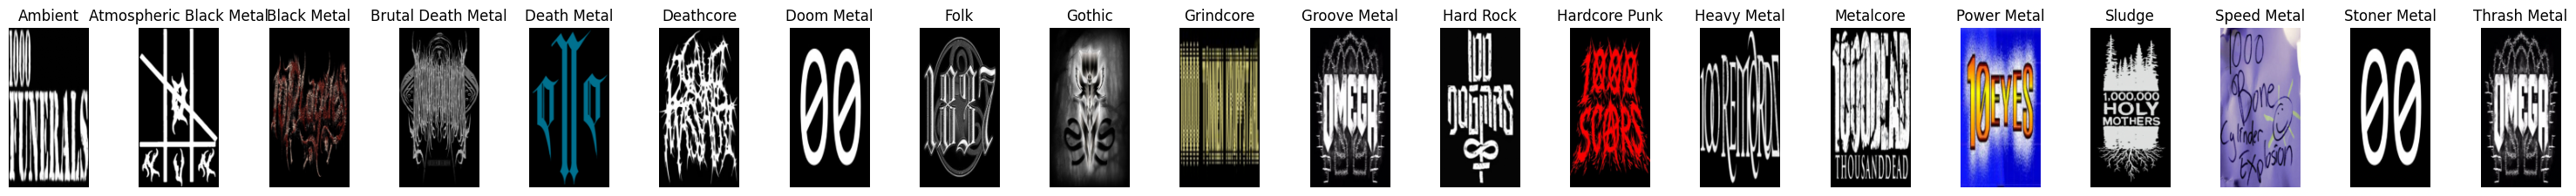

In [225]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(30,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

examples for matched genre label to pictures 

In [226]:
X = np.array(data['data'])
y = np.array(data['label'])

Split the data into training (80%) and testing (20%) sets using scikit-learn's train_test_split function.

In [228]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

Current order in the data (genre-based) messes up a simple 80/20 split. Shuffling beforehand ensures even distribution of genres across training and test sets (improves comparability). Use shuffle=True in train_test_split to achieve this. random_state controls randomness for reproducibility.

Compare category counts in training and test sets to ensure similar photo distribution.

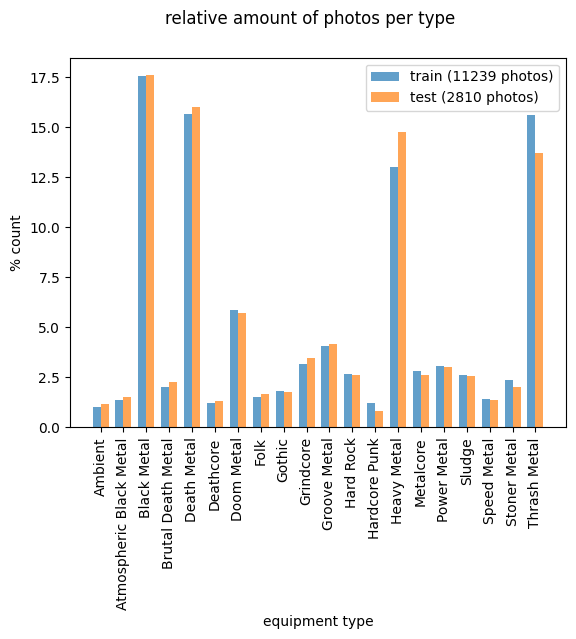

In [229]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=90)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
])

## Processing

### Naive

#### Transformers


In [230]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.color import rgb2gray
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([rgb2gray(img) for img in X])

In [231]:
from sklearn.preprocessing import StandardScaler

grayify = RGB2GrayTransformer()
scalify = StandardScaler()

X_train_gray = grayify.fit_transform(X_train)
flattened_X_train = np.array([img.ravel() for img in X_train_gray])
X_train_prepared = scalify.fit_transform(flattened_X_train)
print(X_train_prepared.shape)

(11239, 20000)


##### Training

In [232]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

c:\Users\Maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=2000, random_state=42)

##### Testing

In [233]:
X_test_gray = grayify.transform(X_test)
flattend_X_test = np.array([img.ravel() for img in X_test_gray])
X_test = scalify.fit_transform(flattend_X_test)

y_pred = sgd_clf.predict(X_test)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False  True False False  True False  True False False False False
 False False False False False False False False False False False False
 False]

Percentage correct:  11.316725978647687


### Hogging

HOG-SVM (Histogram of Oriented Gradients and Support Vector Machines) is a popular method for object recognition. HOGs reduce image complexity while capturing significant variations by dividing the image into blocks and calculating gradient magnitudes in different directions for each block.

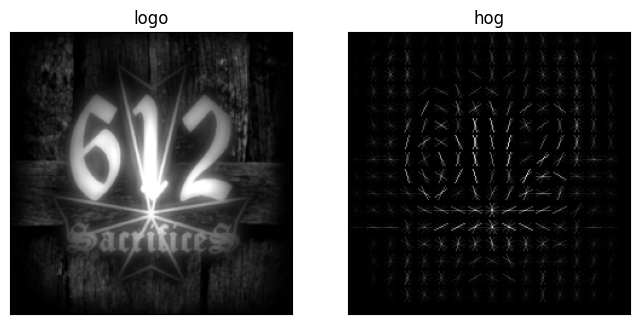

In [234]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
metalLogo = imread(data_path+"\\Atmospheric Black Metal\\612Sacrifices_3540421158_logo.jpg", as_gray=True) # Beispielbild

 
# scale down the image to one third
metalLogo = rescale(metalLogo, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
metal_hog, metal_hog_img = hog(
    metalLogo, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(metalLogo, cmap='gray')
ax[0].set_title('logo')
ax[1].imshow(metal_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

Fewer data points in our model, but the HOG still reveals a metal logo (with a little imagination)

In [235]:
print('number of pixels: ', metalLogo.shape[0] * metalLogo.shape[1])
print('number of hog features: ', metal_hog.shape[0])

number of pixels:  54289
number of hog features:  8100


In [236]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [237]:
from sklearn.model_selection import cross_val_predict
 
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)

 
# call fit_transform on each transform converting X_train step by step
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared_hog = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared_hog.shape)

(11239, 2808)


## Training with HOG

In [238]:
sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=1e-3)
sgd_clf.fit(X_train_prepared_hog, y_train)

c:\Users\Maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=2000, random_state=42)

In [239]:
from sklearn.neural_network import MLPClassifier

mlp_neuralNetworkClassifier = MLPClassifier(random_state=1, max_iter=5000)
mlp_neuralNetworkClassifier.fit(X_train_prepared_hog, y_train)

MLPClassifier(max_iter=5000, random_state=1)

## Testing with HOG



In [240]:
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared_hog = scalify.transform(X_test_hog)

In [241]:
y_pred = sgd_clf.predict(X_test_prepared_hog)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False  True  True False False False False False False  True
  True False False False False False False False False False  True False
 False]

Percentage correct:  13.451957295373665


In [243]:
y_pred = mlp_neuralNetworkClassifier.predict(X_test_prepared_hog)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False]

Percentage correct:  11.245551601423488
